In [147]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import math
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from sklearn.linear_model import LogisticRegression ,RidgeClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

import warnings 
warnings.filterwarnings('ignore')


## 📑 Reading Data and explore info

In [148]:
data = pd.read_csv("Heart Attack.csv")
data

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative
...,...,...,...,...,...,...,...,...,...
1314,44,1,94,122,67,204.0,1.63,0.006,negative
1315,66,1,84,125,55,149.0,1.33,0.172,positive
1316,45,1,85,168,104,96.0,1.24,4.250,positive
1317,54,1,58,117,68,443.0,5.80,0.359,positive


In [149]:
data.describe()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.191812,0.659591,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942
std,13.647315,0.474027,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500
max,103.000000,1.000000,1111.000000,223.000000,154.000000,541.000000,300.000000,10.300000


In [150]:
data.nunique()


age               75
gender             2
impluse           79
pressurehight    116
pressurelow       73
glucose          244
kcm              700
troponin         352
class              2
dtype: int64

In [151]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1319 non-null   int64  
 1   gender         1319 non-null   int64  
 2   impluse        1319 non-null   int64  
 3   pressurehight  1319 non-null   int64  
 4   pressurelow    1319 non-null   int64  
 5   glucose        1319 non-null   float64
 6   kcm            1319 non-null   float64
 7   troponin       1319 non-null   float64
 8   class          1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


In [152]:
data.duplicated().sum()

np.int64(0)

In [153]:
data.isnull().sum()

age              0
gender           0
impluse          0
pressurehight    0
pressurelow      0
glucose          0
kcm              0
troponin         0
class            0
dtype: int64

## 🎇 EDA

In [154]:
data["class"].value_counts()

class
positive    810
negative    509
Name: count, dtype: int64

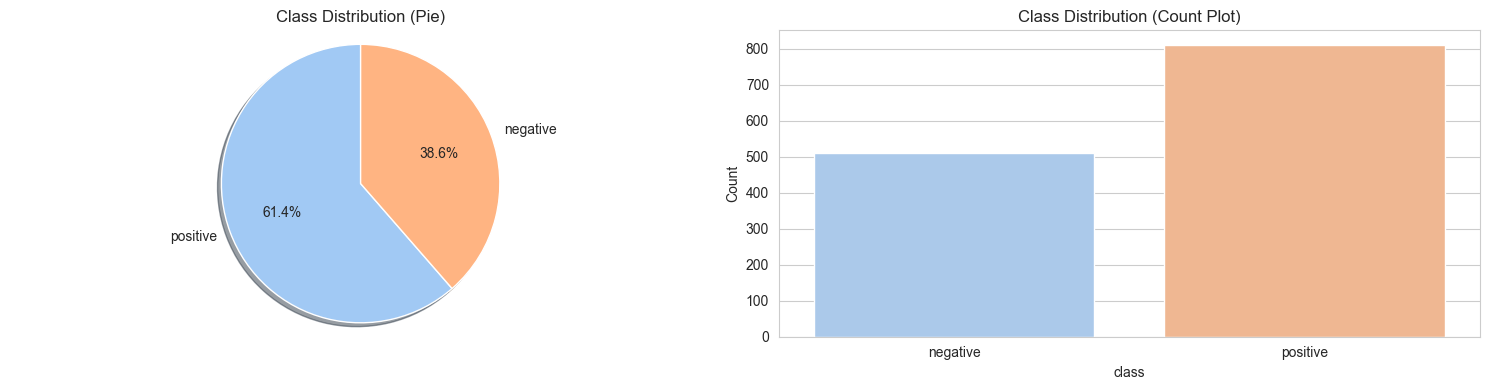

In [155]:
value_counts = data["class"].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(15, 4))

sns.set_style("whitegrid")
colors = sns.color_palette("pastel")

# ax 1
axes[0].pie(value_counts.values,labels=value_counts.index,colors=colors,autopct='%1.1f%%',startangle=90,shadow=True)
axes[0].set_title("Class Distribution (Pie)")
axes[0].axis('equal')


# ax 2 
sns.countplot(data=data, x="class", palette="pastel", ax=axes[1],hue="class")
axes[1].set_title("Class Distribution (Count Plot)")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()


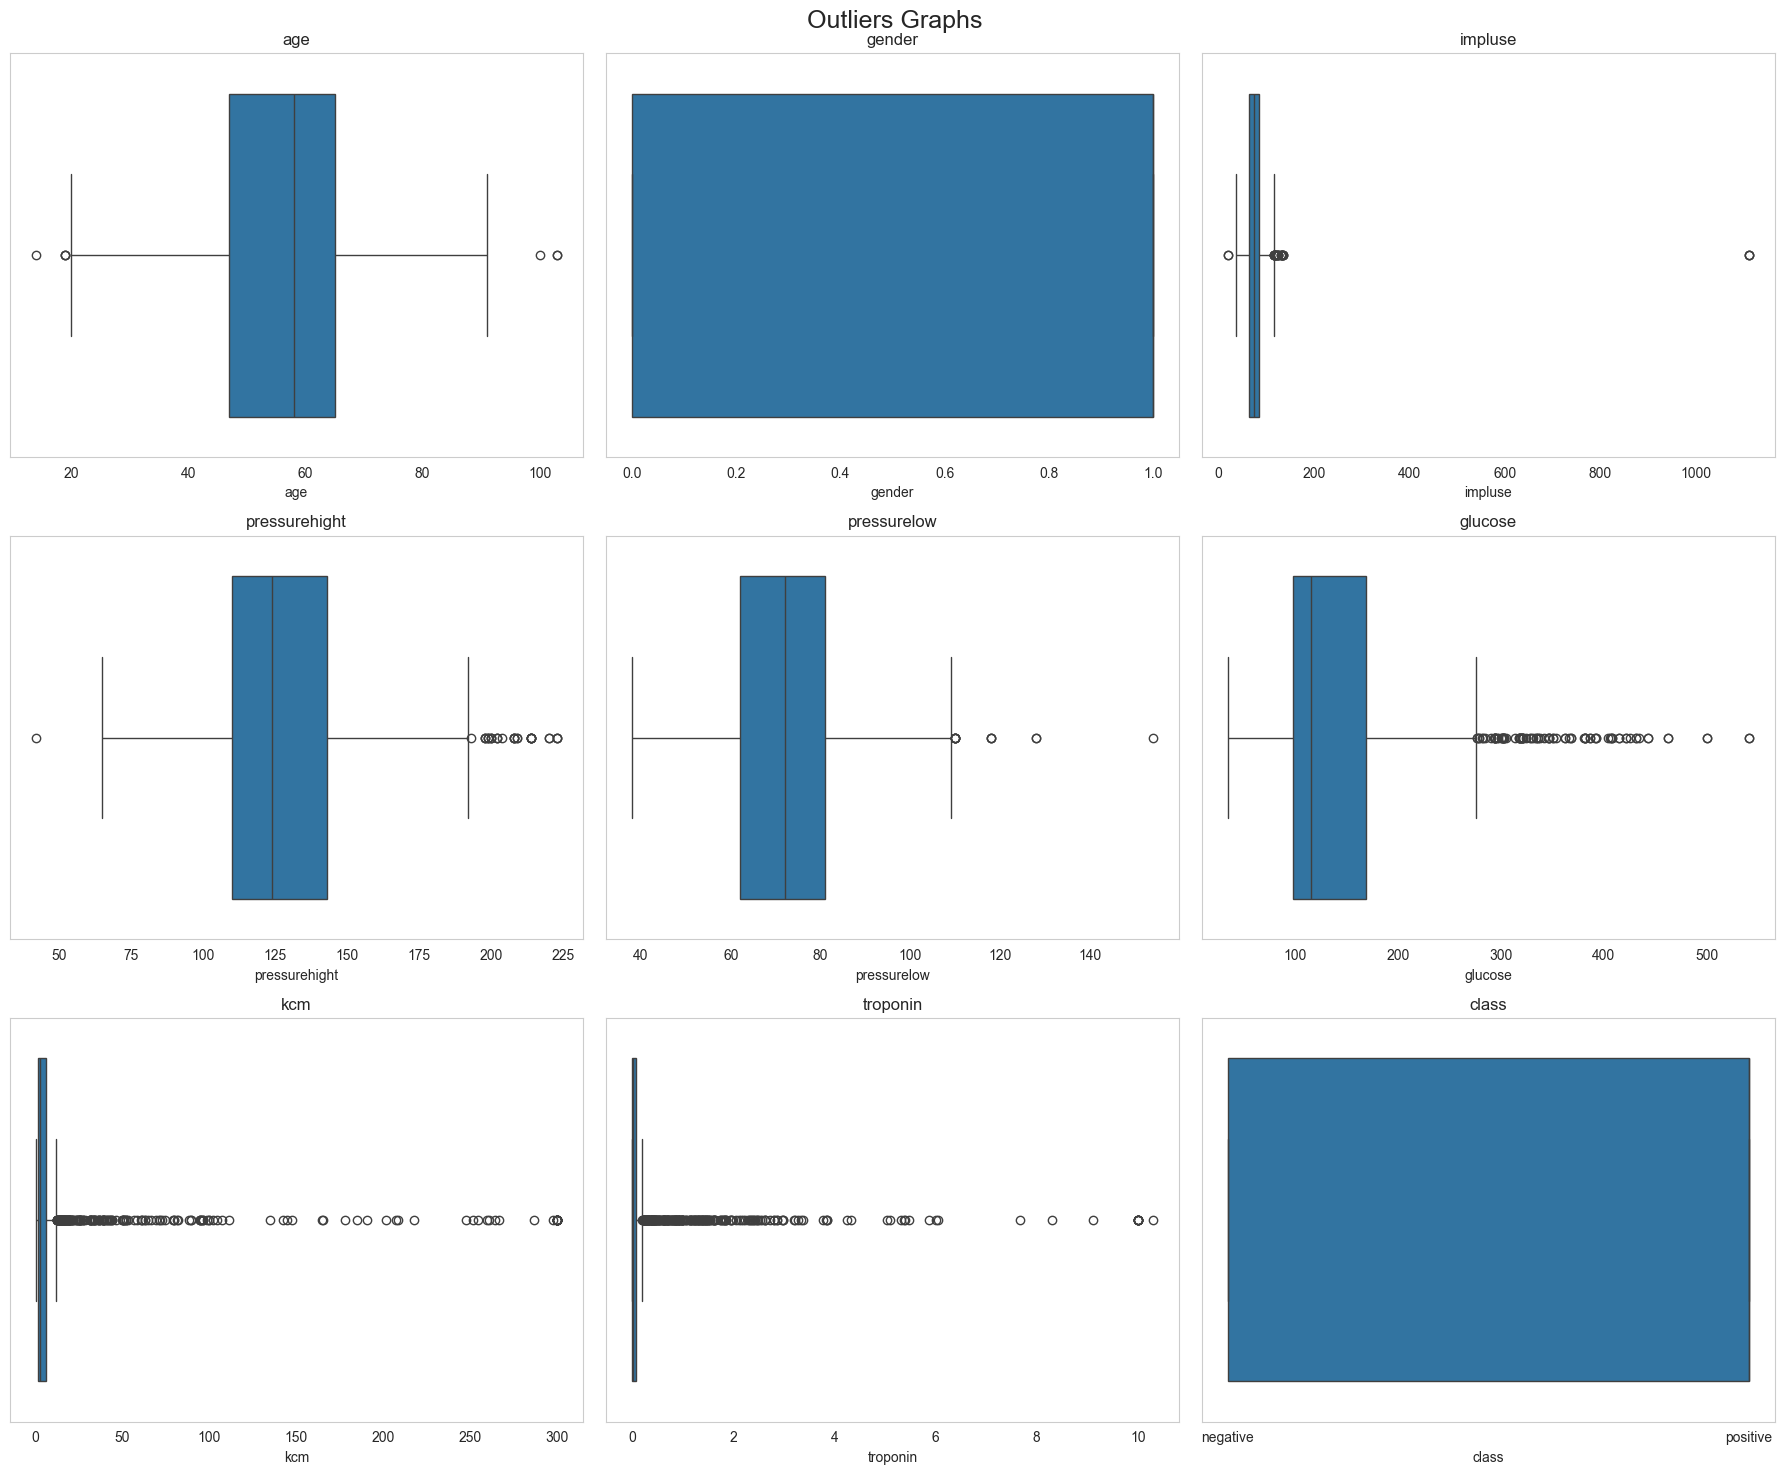

In [156]:
cols = data.select_dtypes(exclude="category").columns
n_cols = 3
n_rows = math.ceil(len(cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
fig.suptitle("Outliers Graphs", fontsize=18)

axes = axes.flatten()

for ax, column in zip(axes, cols):
    sns.boxplot(x=data[column], ax=ax)
    ax.set_title(column)
    ax.grid(False)

plt.tight_layout()
plt.show()


### Age Column Representation

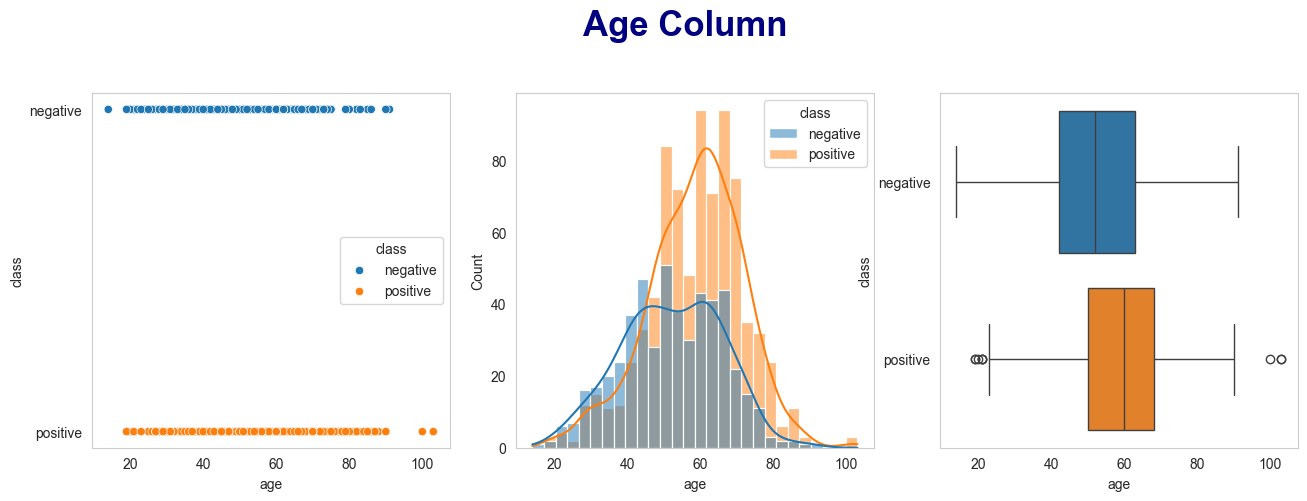

In [157]:
fig, axes = plt.subplots(1, 3, figsize=(13, 5))
plt.suptitle('Age Column', fontsize=25, fontweight='bold', color='navy')
fig.tight_layout(pad=2.0)

# ax1
sns.scatterplot(data=data, x='age', y='class', ax=axes[0], hue='class')

# ax2
sns.histplot(data=data, x='age', ax=axes[1],kde=True,hue="class")

# ax3
sns.boxplot(data=data, x='age', y='class', ax=axes[2],hue="class")

axes[0].grid(False)
axes[1].grid(False)
axes[2].grid(False)


plt.show()

### Gender Column Representation

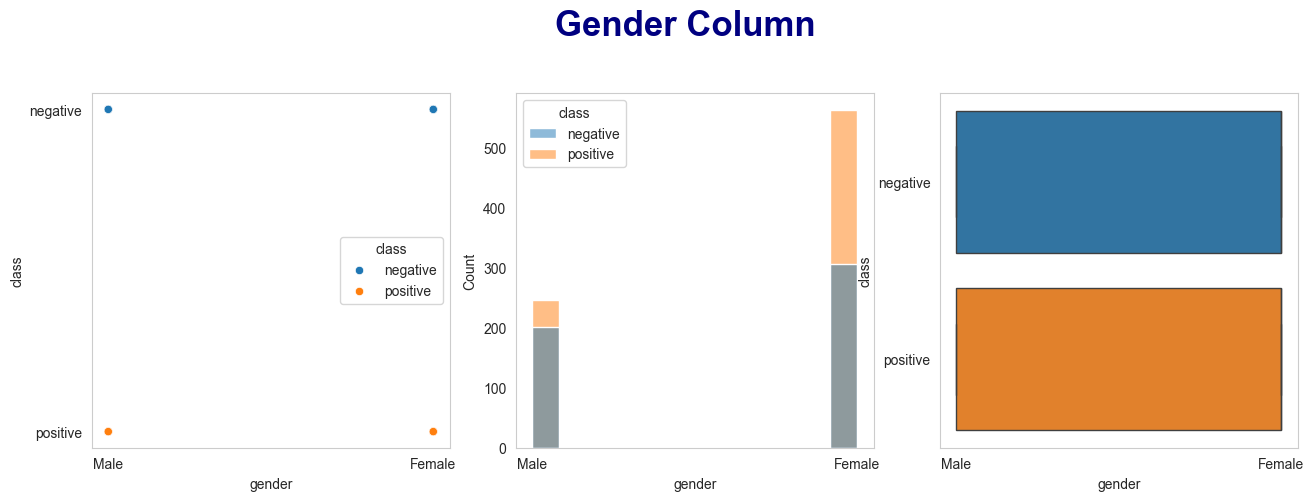

In [158]:
# col2 : gender
fig, axes = plt.subplots(1, 3, figsize=(13, 5))
plt.suptitle('Gender Column', fontsize=25, fontweight='bold', color='navy')
fig.tight_layout(pad=2.0)

# ax1
sns.scatterplot(data=data, x='gender', y='class', ax=axes[0], hue='class')
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(np.array(['Male', 'Female']))

# ax2
sns.histplot(data=data, x='gender', ax=axes[1],hue="class")
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(np.array(['Male', 'Female']))

# ax3
sns.boxplot(data=data, x='gender', y='class', ax=axes[2],hue="class")
axes[2].set_xticks([0, 1])
axes[2].set_xticklabels(np.array(['Male', 'Female']))

axes[0].grid(False)
axes[1].grid(False)
axes[2].grid(False)

plt.show()

### Impluse Column Representation

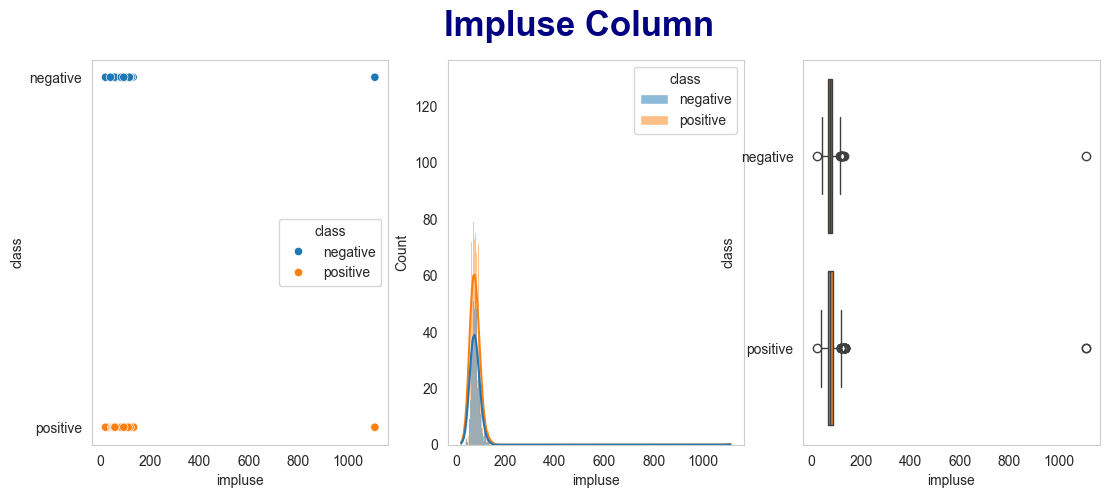

In [159]:
# Col3 : impluse
fig, axes = plt.subplots(1, 3, figsize=(13, 5))
plt.suptitle('Impluse Column', fontsize=25, fontweight='bold', color='navy')

# ax1
sns.scatterplot(data=data, x='impluse', y='class', ax=axes[0], hue='class')

# ax2
sns.histplot(data=data, x='impluse', ax=axes[1],hue="class",kde=True)

# ax3
sns.boxplot(data=data, x='impluse', y='class', ax=axes[2],hue="class")

axes[0].grid(False)
axes[1].grid(False)
axes[2].grid(False)

plt.show()

### Pressurehight Column Representation

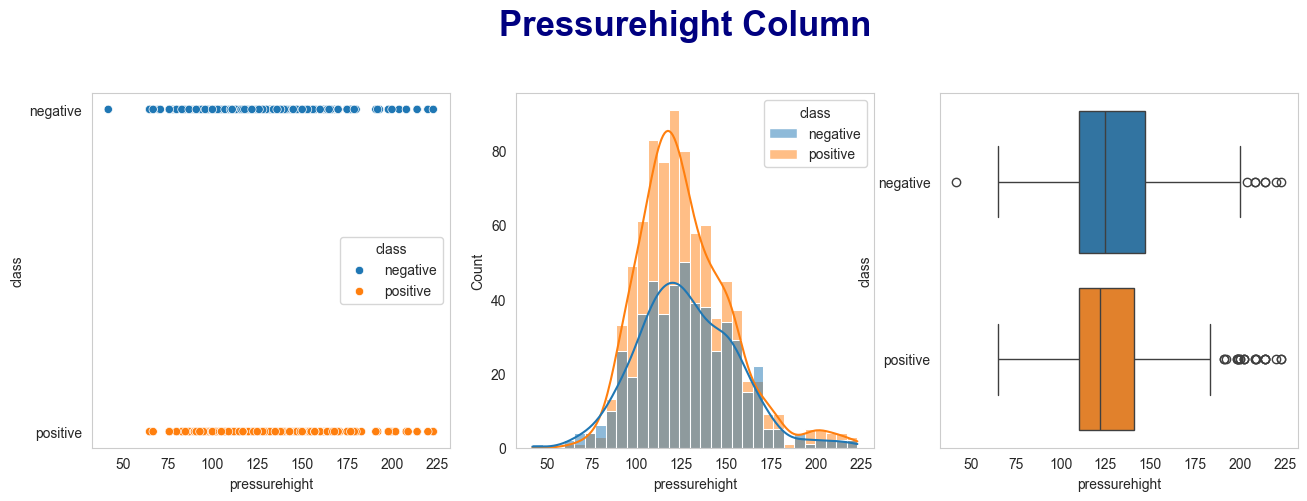

In [160]:
fig, axes = plt.subplots(1, 3, figsize=(13, 5))
plt.suptitle('Pressurehight Column', fontsize=25, fontweight='bold', color='navy')
fig.tight_layout(pad=2.0)

# ax1
sns.scatterplot(data=data, x='pressurehight', y='class', ax=axes[0], hue='class')
axes[0].grid(False)

# ax2
sns.histplot(data=data, x='pressurehight', ax=axes[1],hue="class",kde=True)
axes[1].grid(False)


# ax3
sns.boxplot(data=data, x='pressurehight', y='class', ax=axes[2],hue="class")
axes[2].grid(False)


plt.show()

### Pressurelow Column Representation

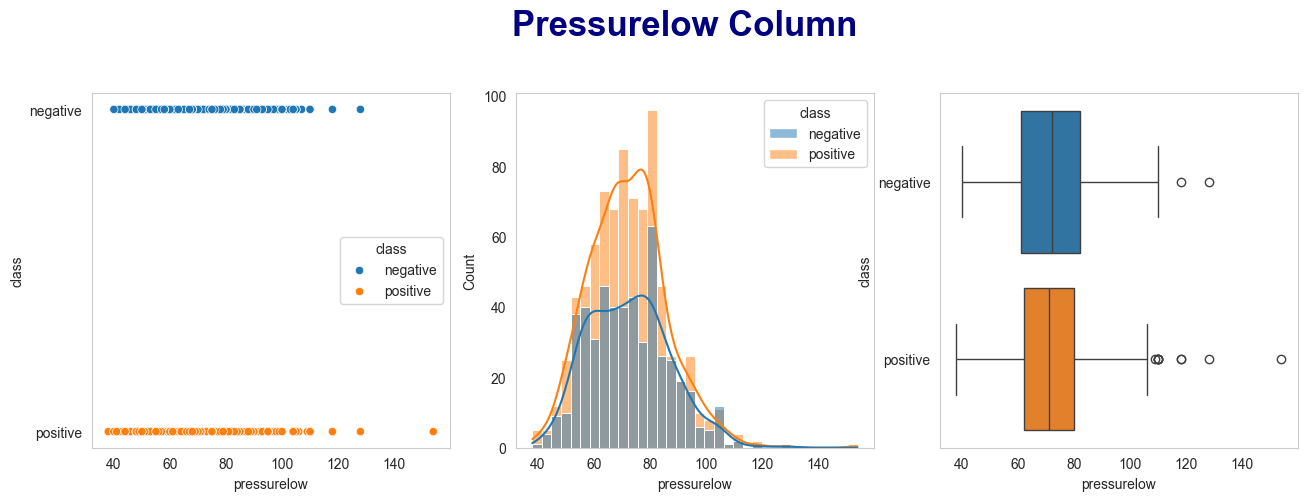

In [161]:
fig, axes = plt.subplots(1, 3, figsize=(13, 5))
plt.suptitle('Pressurelow Column', fontsize=25, fontweight='bold', color='navy')
fig.tight_layout(pad=2.0)

# ax1
sns.scatterplot(data=data, x='pressurelow', y='class', ax=axes[0], hue='class')
axes[0].grid(False)

# ax2
sns.histplot(data=data, x='pressurelow', ax=axes[1],hue="class",kde=True)
axes[1].grid(False)


# ax3
sns.boxplot(data=data, x='pressurelow', y='class', ax=axes[2],hue="class")
axes[2].grid(False)


plt.show()

### Glucose Column Representation

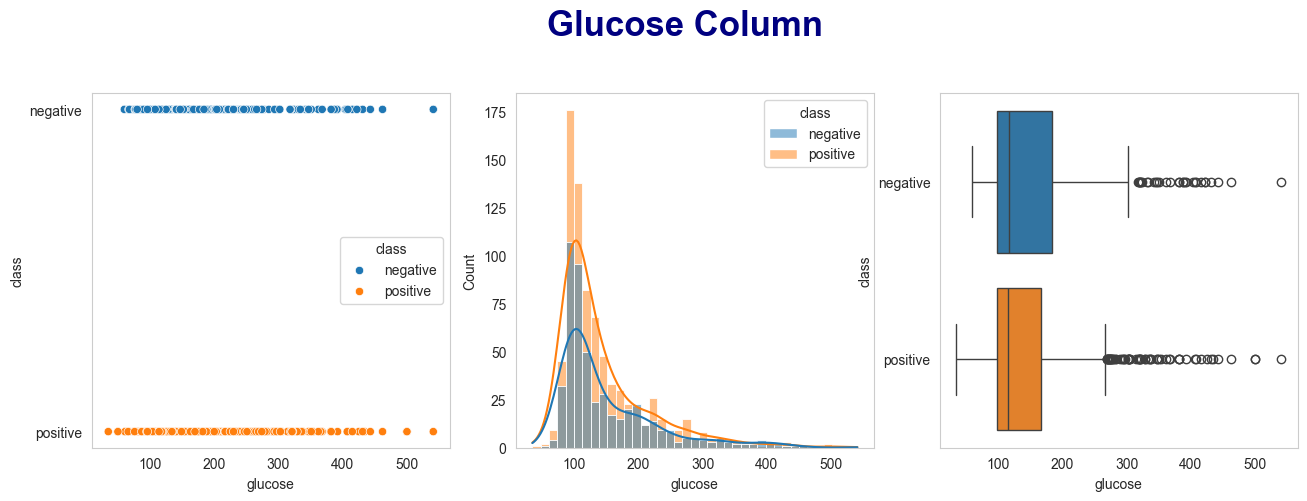

In [162]:
fig, axes = plt.subplots(1, 3, figsize=(13, 5))
plt.suptitle('Glucose Column', fontsize=25, fontweight='bold', color='navy')
fig.tight_layout(pad=2.0)

# ax1
sns.scatterplot(data=data, x='glucose', y='class', ax=axes[0], hue='class')
axes[0].grid(False)

# ax2
sns.histplot(data=data, x='glucose', ax=axes[1],hue="class",kde=True)
axes[1].grid(False)


# ax3
sns.boxplot(data=data, x='glucose', y='class', ax=axes[2],hue="class")
axes[2].grid(False)


plt.show()

### kcm Column Representation

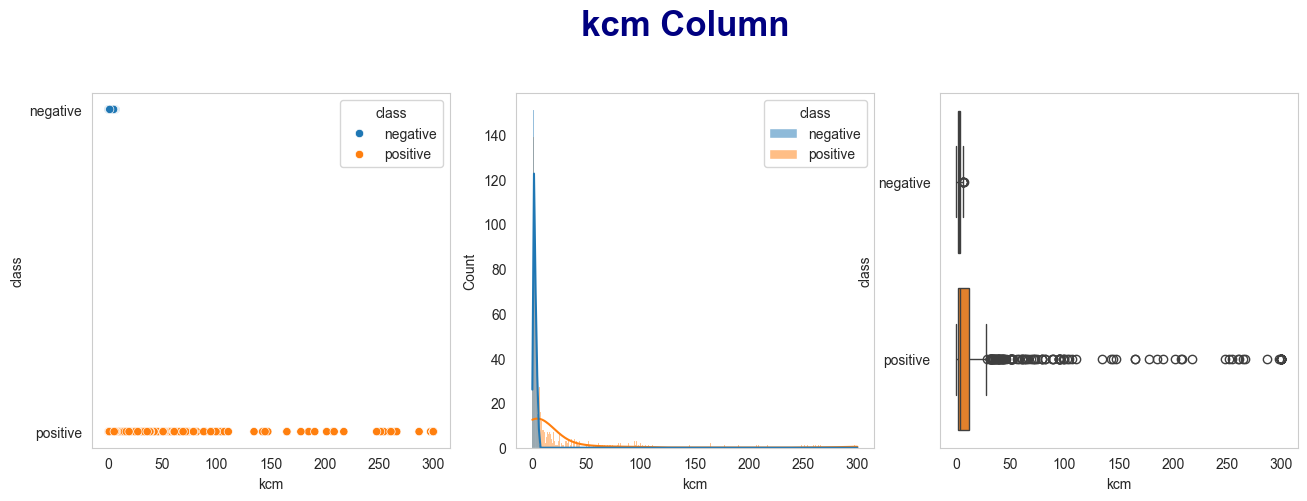

In [163]:
fig, axes = plt.subplots(1, 3, figsize=(13, 5))
plt.suptitle('kcm Column', fontsize=25, fontweight='bold', color='navy')
fig.tight_layout(pad=2.0)

# ax1
sns.scatterplot(data=data, x='kcm', y='class', ax=axes[0], hue='class')
axes[0].grid(False)

# ax2
sns.histplot(data=data, x='kcm', ax=axes[1],hue="class",kde=True)
axes[1].grid(False)


# ax3
sns.boxplot(data=data, x='kcm', y='class', ax=axes[2],hue="class")
axes[2].grid(False)


plt.show()

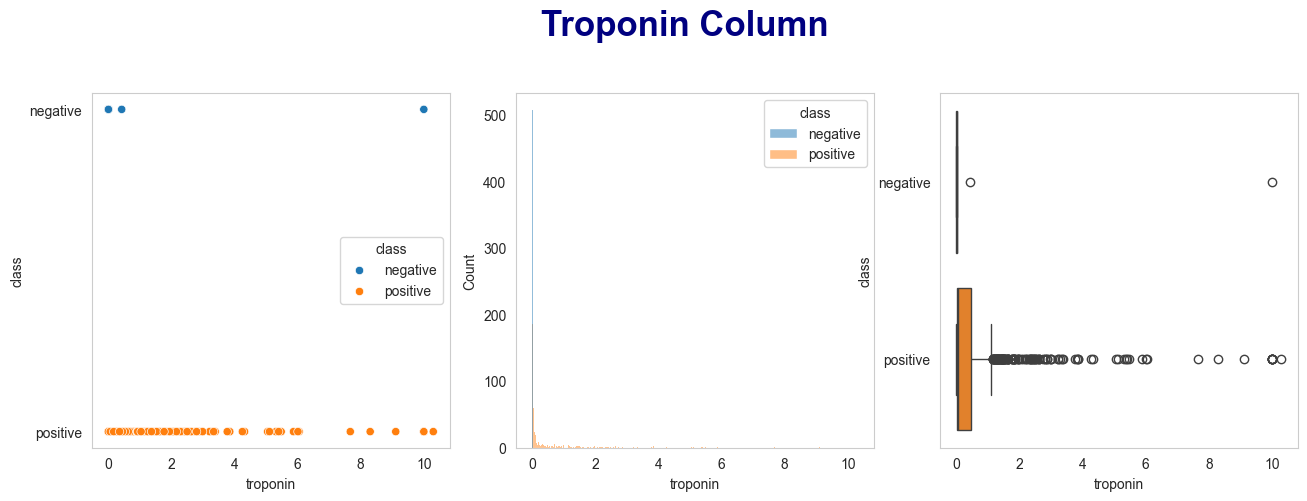

In [164]:
fig, axes = plt.subplots(1, 3, figsize=(13, 5))
plt.suptitle('Troponin Column', fontsize=25, fontweight='bold', color='navy')
fig.tight_layout(pad=2.0)

# ax1
sns.scatterplot(data=data, x='troponin', y='class', ax=axes[0], hue='class')
axes[0].grid(False)

# ax2
sns.histplot(data=data, x='troponin', ax=axes[1],hue="class",kde=False)
axes[1].grid(False)


# ax3
sns.boxplot(data=data, x='troponin', y='class', ax=axes[2],hue="class")
axes[2].grid(False)


plt.show()

### Features Correlation

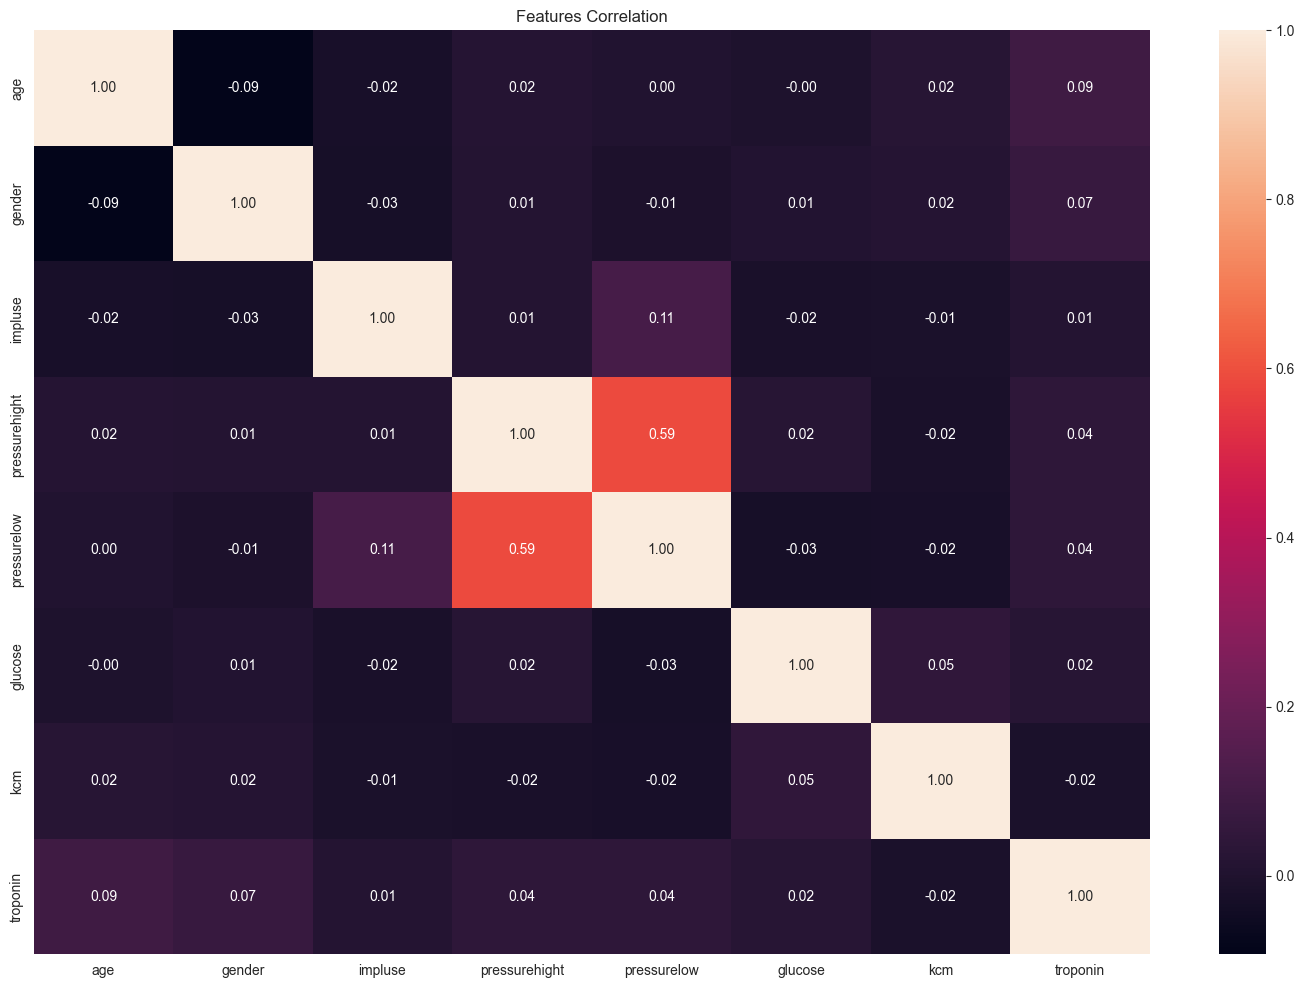

In [165]:
corr = data.iloc[:,:-1].corr()
plt.figure(figsize=(18,12))
sns.heatmap(corr,annot=True,fmt=".2f")
plt.title("Features Correlation")
plt.show()

## 🛠 Data Preprocessing

In [166]:
low = data[data["pressurelow"]> data["pressurehight"]]

### Swap values for Any Rows have `Pressure Low` **greater than** `Pressure Height` 


In [167]:
lowpressure = low["pressurelow"].values
highpressure = low["pressurehight"].values

data.iloc[low.index,3] = lowpressure
data.iloc[low.index,4] = highpressure

#! After Swapping Values
data.iloc[low.index,:]


,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
150,45,0,86,92,70,90.0,4.760,0.003,negative
151,55,1,92,93,71,127.0,1.800,0.009,negative
152,58,1,103,92,78,109.0,3.840,0.008,negative
209,60,1,68,64,42,106.0,0.879,0.426,negative
515,56,1,61,80,67,91.0,2.090,0.004,negative
900,57,0,61,80,67,204.0,33.090,0.003,positive
1203,65,1,77,154,76,93.0,3.810,0.029,positive
1271,39,0,61,80,67,145.0,1.600,0.005,negative


### Remove Outlier Data from `impluse` Column

In [168]:
data[data["impluse"]>400]
data = data[data["impluse"]<400]


### Remove Outlier Data from `troponin` Column

In [169]:
data[data["troponin"]>5][data["class"] == "negative"]

data.drop(index=29,inplace=True,axis=0)

In [170]:
data.reset_index()

,index,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,0,64,1,66,160,83,160.0,1.80,0.012,negative
1,1,21,1,94,98,46,296.0,6.75,1.060,positive
2,2,55,1,64,160,77,270.0,1.99,0.003,negative
3,3,64,1,70,120,55,270.0,13.87,0.122,positive
4,4,55,1,64,112,65,300.0,1.08,0.003,negative
...,...,...,...,...,...,...,...,...,...,...
1310,1314,44,1,94,122,67,204.0,1.63,0.006,negative
1311,1315,66,1,84,125,55,149.0,1.33,0.172,positive
1312,1316,45,1,85,168,104,96.0,1.24,4.250,positive
1313,1317,54,1,58,117,68,443.0,5.80,0.359,positive


### Label Encoder for `class` Column 
- nagative = 0
- positive = 1

In [171]:
mapping_data = {"negative":0 , "positive":1}
data["Sick"]= data["class"].map(mapping_data)
data

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class,Sick
0,64,1,66,160,83,160.0,1.80,0.012,negative,0
1,21,1,94,98,46,296.0,6.75,1.060,positive,1
2,55,1,64,160,77,270.0,1.99,0.003,negative,0
3,64,1,70,120,55,270.0,13.87,0.122,positive,1
4,55,1,64,112,65,300.0,1.08,0.003,negative,0
...,...,...,...,...,...,...,...,...,...,...
1314,44,1,94,122,67,204.0,1.63,0.006,negative,0
1315,66,1,84,125,55,149.0,1.33,0.172,positive,1
1316,45,1,85,168,104,96.0,1.24,4.250,positive,1
1317,54,1,58,117,68,443.0,5.80,0.359,positive,1


In [172]:
data.drop("class",inplace=True,axis=1)
data

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,Sick
0,64,1,66,160,83,160.0,1.80,0.012,0
1,21,1,94,98,46,296.0,6.75,1.060,1
2,55,1,64,160,77,270.0,1.99,0.003,0
3,64,1,70,120,55,270.0,13.87,0.122,1
4,55,1,64,112,65,300.0,1.08,0.003,0
...,...,...,...,...,...,...,...,...,...
1314,44,1,94,122,67,204.0,1.63,0.006,0
1315,66,1,84,125,55,149.0,1.33,0.172,1
1316,45,1,85,168,104,96.0,1.24,4.250,1
1317,54,1,58,117,68,443.0,5.80,0.359,1


### We notice here that the correlation between Pressure low and pressure high is increased from **`0.59`** to **`0.62`**

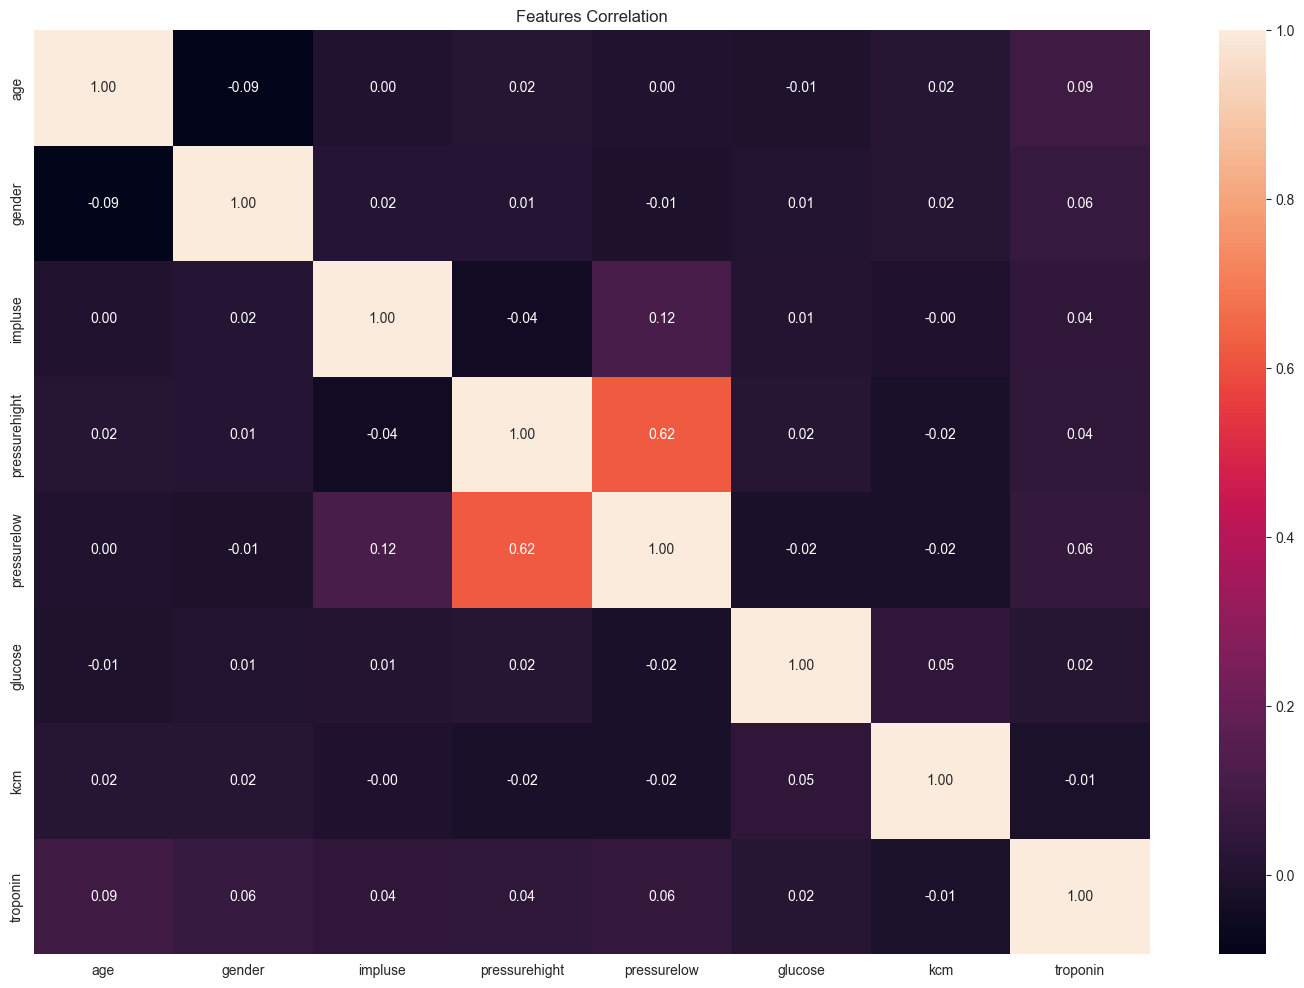

In [186]:
corr = data.iloc[:,:-1].corr()
plt.figure(figsize=(18,12))
sns.heatmap(corr,annot=True,fmt=".2f")
plt.title("Features Correlation")
plt.show()

### 🛠 Scale All Numeric Columns that have a wide range

In [173]:
Columns_Scalers = {}
for column in ['age', 'impluse','pressurehight','pressurelow','glucose','kcm']:
    scaler = StandardScaler()
    data[column]  = scaler.fit_transform(data[[column]])
    Columns_Scalers[column] = scaler


## 🟢 Starting Building Models

In [174]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [175]:
x_train , x_test , y_train , y_test = train_test_split(x,y,shuffle=True,test_size=0.2,random_state=42)

### ⚠ Compute Class Weights to avoid bias for the majority class

In [176]:
classweights = compute_class_weight(classes=np.unique(y),class_weight="balanced",y=y)
classweights = dict(zip(np.unique(y), classweights))
classweights

{np.int64(0): np.float64(1.2968441814595661),
 np.int64(1): np.float64(0.8137376237623762)}

## 🟢 Training Multiple Models and choose the best  

In [177]:
ml_models = {
    "Logistic Regression": LogisticRegression(max_iter=1000,random_state=42,class_weight=classweights),
    "Random Forest": RandomForestClassifier(random_state=42,class_weight=classweights),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "SVC": SVC(random_state=42,class_weight=classweights),
    "Decision Tree": DecisionTreeClassifier(random_state=42,class_weight=classweights,max_depth=7),
    "Extra Trees": ExtraTreesClassifier(random_state=42,class_weight=classweights),
    "Ridge Classifier": RidgeClassifier(random_state=42,class_weight=classweights)
}

ml_results = {}
for name, model in ml_models.items():
    model.fit(x_train, y_train)
    preds = model.predict(x_test)
    ml_results[name] = accuracy_score(y_test, preds)

In [178]:
all_results = sorted(ml_results.items(),key=lambda x: x[1],reverse=True)
all_results = dict(all_results)
all_results

{'Decision Tree': 0.9847908745247148,
 'Random Forest': 0.9809885931558935,
 'Gradient Boosting': 0.9809885931558935,
 'AdaBoost': 0.9809885931558935,
 'Extra Trees': 0.9049429657794676,
 'Logistic Regression': 0.8250950570342205,
 'SVC': 0.7300380228136882,
 'Ridge Classifier': 0.6692015209125475}

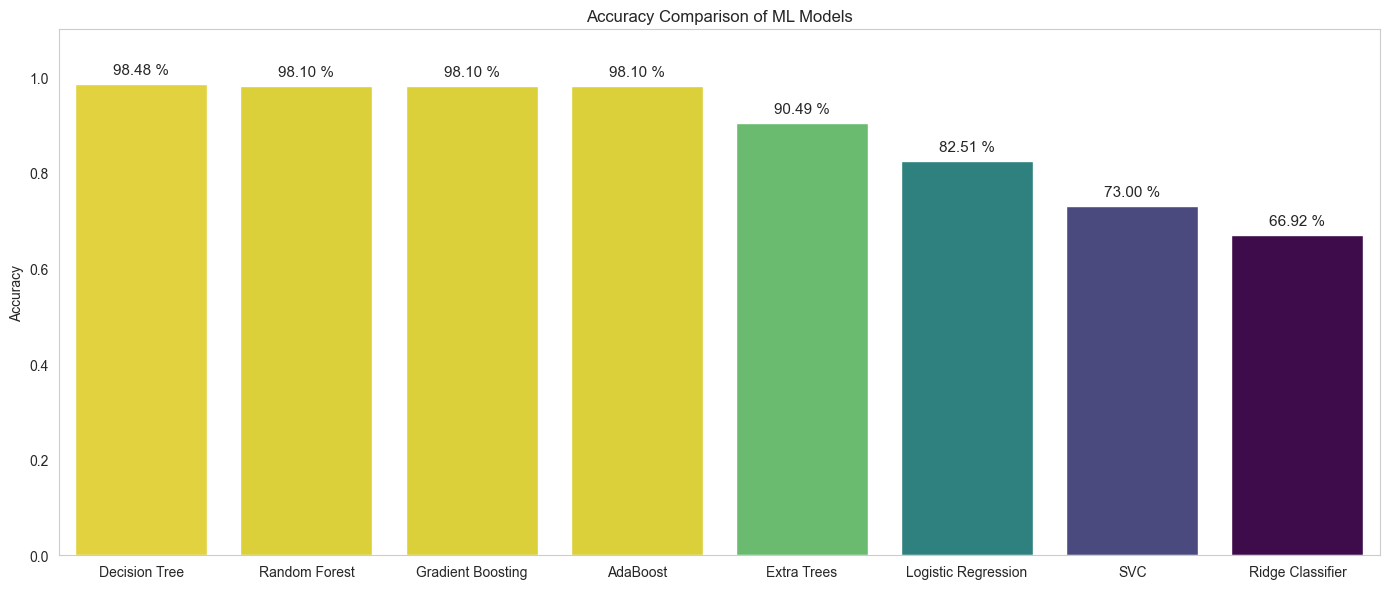

In [179]:
plt.figure(figsize=(14, 6))
ax = sns.barplot(x=list(all_results.keys()),y=list(all_results.values()),palette="viridis",hue=list(all_results.values()),legend=False)
plt.title("Accuracy Comparison of ML Models")
plt.ylabel("Accuracy")
plt.xticks(rotation=0)
plt.ylim(0, 1.1)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f"{height*100:.2f} %",(p.get_x() + p.get_width() / 2, height),ha="center",va="bottom",fontsize=11,xytext=(0, 5),textcoords="offset points")

plt.tight_layout()
plt.grid(False)
plt.show()


## ✅ Best models to avoid **`overfitting`**
- Random Forest
- Gradient Boosting 
- AdaBoost 

In [180]:
model = ml_models["Random Forest"]
preds = model.predict(x_test)

In [187]:
accuracy = accuracy_score(y_test,preds)
print(f"The Best Accurecy is from Random Forest model = {accuracy*100:0.2f} %")


The Best Accurecy is from Random Forest model = 98.10 %


In [182]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       102
           1       0.99      0.98      0.98       161

    accuracy                           0.98       263
   macro avg       0.98      0.98      0.98       263
weighted avg       0.98      0.98      0.98       263



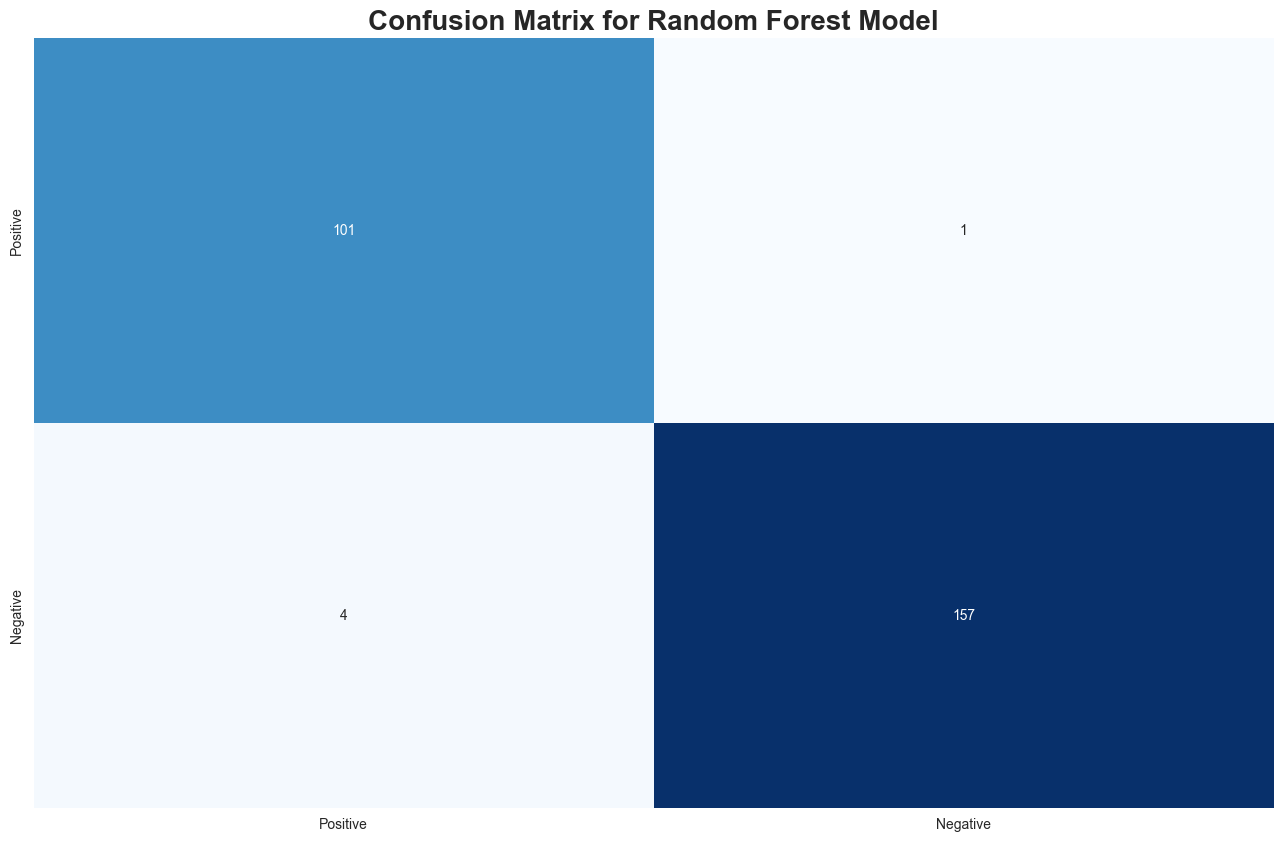

In [205]:
acc = confusion_matrix(y_test,preds)
plt.figure(figsize=(16,10))
plt.title("Confusion Matrix for Random Forest Model",weight="bold",size=20)
sns.heatmap(acc,xticklabels=["Positive","Negative"],yticklabels=["Positive","Negative"],annot=True,cmap="Blues",fmt=f".0f",cbar=False)
plt.show()

## 💻 Inference Code

In [184]:
Columns_Scalers

{'age': StandardScaler(),
 'impluse': StandardScaler(),
 'pressurehight': StandardScaler(),
 'pressurelow': StandardScaler(),
 'glucose': StandardScaler(),
 'kcm': StandardScaler()}

In [185]:
test = pd.DataFrame({
    "age":[Columns_Scalers["age"].fit_transform([[64]])],
    "gender":[1],
    "impluse":[Columns_Scalers["impluse"].fit_transform([[66]])],
    "pressurehight":[Columns_Scalers["pressurehight"].fit_transform([[160]])],
    "pressurelow":[Columns_Scalers["pressurelow"].fit_transform([[83]])],
    "glucose":[Columns_Scalers["glucose"].fit_transform([[160]])],
    "kcm":[Columns_Scalers["kcm"].fit_transform([[1.80]])],
    "troponin":[0.012]}
    
    )

if model.predict(test) == 1:
    print("Positive")
else:
    print("Negative")

Positive


---

<h1 align="center">The End of model 😎</h1>


---